In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score  # Import accuracy metric

In [10]:
#reading data
data = pd.read_csv('games.csv')
customers_data=data.copy()
customers_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [11]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [12]:
#id, white_id and black_id not important in determining the winner
#created_at and end at doest not determine the game and has high wrong info
#deleting move because it will directly say who wins

cols_to_drop = ['id']#'white_id','black_id','last_move_at','created_at','moves' 
customers_data.drop(cols_to_drop, axis=1, inplace=True)

In [13]:
print(customers_data.duplicated().value_counts()) ##checking for duplicated data
print("----")
customers_data=customers_data.drop_duplicates() # dropping duplicated data
print(customers_data.duplicated().value_counts())

False    19629
True       429
Name: count, dtype: int64
----
False    19629
Name: count, dtype: int64


In [14]:
customers_data.isin(['?']).sum()
customers_data.replace('?',np.NaN,inplace =True)

In [15]:
customers_data.isin([np.NaN]).sum()
customers_data.isnull().sum()
customers_data.dropna(how='any',inplace=True)

In [16]:
customers_data=customers_data.dropna()
customers_data.isnull()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20054,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20055,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20056,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
def change_string_to_int(column):
    variables=pd.unique(customers_data[column])
    for item in range(variables.size):
        customers_data[column]=[item if each==variables[item] else each for each in customers_data[column]]
    return customers_data[column]

In [18]:
for col in customers_data.columns:
    if customers_data[col].dtype=='object':
        
        customers_data[col]=change_string_to_int(col)

In [19]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19629 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           19629 non-null  bool   
 1   created_at      19629 non-null  float64
 2   last_move_at    19629 non-null  float64
 3   turns           19629 non-null  int64  
 4   victory_status  19629 non-null  int64  
 5   winner          19629 non-null  int64  
 6   increment_code  19629 non-null  int64  
 7   white_id        19629 non-null  int64  
 8   white_rating    19629 non-null  int64  
 9   black_id        19629 non-null  int64  
 10  black_rating    19629 non-null  int64  
 11  moves           19629 non-null  int64  
 12  opening_eco     19629 non-null  int64  
 13  opening_name    19629 non-null  int64  
 14  opening_ply     19629 non-null  int64  
dtypes: bool(1), float64(2), int64(12)
memory usage: 2.3 MB


In [20]:
customers_data.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,1.504210e+12,1.504210e+12,13,0,0,0,0,1500,0,1191,0,0,0,5
1,True,1.504130e+12,1.504130e+12,16,1,1,1,1,1322,1,1261,1,1,1,4
2,True,1.504130e+12,1.504130e+12,61,2,0,1,2,1496,0,1500,2,2,2,3
3,True,1.504110e+12,1.504110e+12,61,2,0,2,3,1439,2,1454,3,3,3,3
4,True,1.504030e+12,1.504030e+12,95,2,0,3,4,1523,2,1469,4,4,4,5


In [21]:
random_seed=42
data_copy_sample=customers_data.copy() #Using all the dataa

In [22]:
X=data_copy_sample.drop(columns=['winner'],axis=1) #dropping class 
y=data_copy_sample['winner']
X.head()

,rated,created_at,last_move_at,turns,victory_status,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,1.504210e+12,1.504210e+12,13,0,0,0,1500,0,1191,0,0,0,5
1,True,1.504130e+12,1.504130e+12,16,1,1,1,1322,1,1261,1,1,1,4
2,True,1.504130e+12,1.504130e+12,61,2,1,2,1496,0,1500,2,2,2,3
3,True,1.504110e+12,1.504110e+12,61,2,2,3,1439,2,1454,3,3,3,3
4,True,1.504030e+12,1.504030e+12,95,2,3,4,1523,2,1469,4,4,4,5


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [24]:
#splitting the data into 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)  # Added DT
}


In [26]:
k_values = range(3, 21)
# Dictionary to store results
results = []

In [27]:
# Perform cross-validation for each K value
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle to reduce order bias

    for model_name, model in models.items():
        # Compute cross-validation scores
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Compute test accuracy
        test_accuracy = accuracy_score(y_test, y_pred)

        # Compute variance using cross-validation on training data
        train_accuracies = cross_val_score(model, X_train, y_train, cv=kf)
        train_accuracy_mean = np.mean(train_accuracies)  # Training accuracy
        train_accuracy_variance = np.var(train_accuracies)  # Training accuracy variance


        # Compute bias using test set (1 - Accuracy)
        ##bias = 1 - accuracy

        bias = train_accuracy_mean - test_accuracy

        results.append({
            "Model": model_name,
            "K": k,
            "Training Accuracy": train_accuracy_mean,
            "Variance": train_accuracy_variance,
            "Test Accuracy": test_accuracy,
            "Bias": bias
        })

        


KeyboardInterrupt: 

In [8]:
# Convert results into a DataFrame
import pandas as pd
df_results = pd.DataFrame(results)

# Save results to a CSV file
df_results.to_csv("bias_variance_results.csv", index=False)

# Display results without ace_tools
print(df_results.head())  # Print first 5 rows for verification

NameError: name 'results' is not defined

In [5]:
df_check = pd.read_csv("bias_variance_results.csv")
print(df_check.head())  # Print first few rows

                    Model  K  Training Accuracy  Variance  Test Accuracy  \
0     Logistic Regression  3           0.667977  0.000052       0.661572   
1     K-Nearest Neighbors  3           0.578166  0.000008       0.578366   
2  Support Vector Machine  3           0.658588  0.000065       0.658855   
3           Decision Tree  3           0.603566  0.000009       0.614026   
4     Logistic Regression  4           0.669360  0.000076       0.661572   

       Bias  
0  0.006404  
1 -0.000201  
2 -0.000267  
3 -0.010460  
4  0.007787  


In [6]:
# Function to plot Bias vs K and Variance vs K for each model
def plot_results(df, metric, ylabel, title_suffix):
    for model_name in df["Model"].unique():
        plt.figure(figsize=(8, 5))

        # Filter data for a specific model
        model_data = df[df["Model"] == model_name]
        x = model_data["K"].values
        y = model_data[metric].values

        # Scatter plot (Black markers)
        plt.scatter(x, y, color="black", label=f"{model_name} {ylabel}")

        # Fit and plot a straight trend line (Linear regression of degree 1)
        z = np.polyfit(x, y, 1)  # Linear trend line
        p = np.poly1d(z)
        plt.plot(x, p(x), color="black")  # Solid black trend line
        
        # Labels and title
        plt.xlabel("K Value")
        plt.ylabel(ylabel)
        plt.title(f"{ylabel} vs K Value ({model_name})")
        plt.legend()
        plt.grid(color='gray', linestyle='solid', linewidth=0.5)
        plt.show()

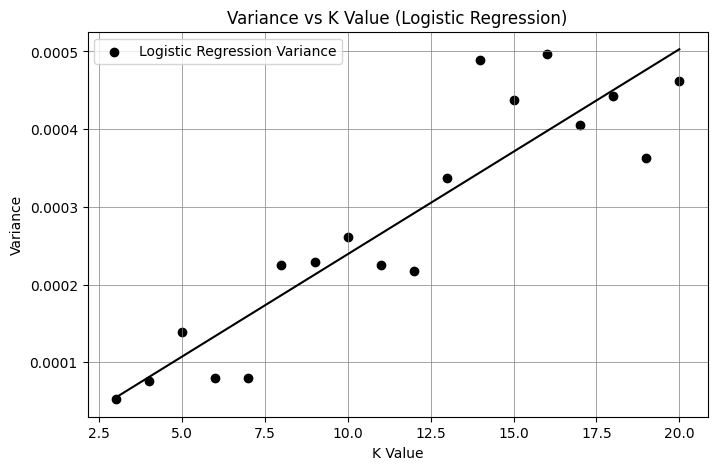

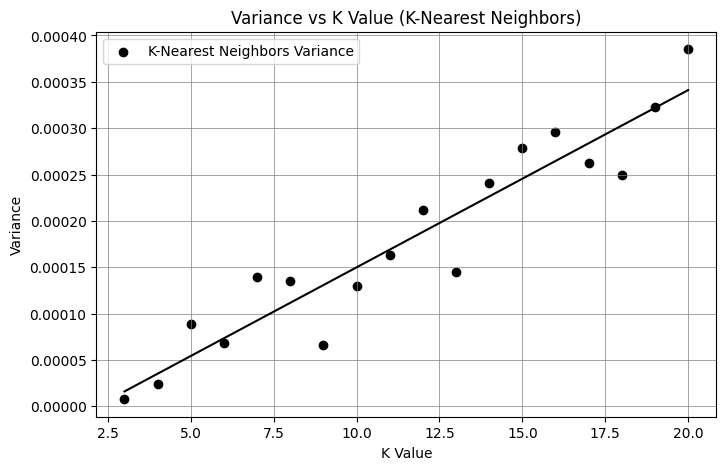

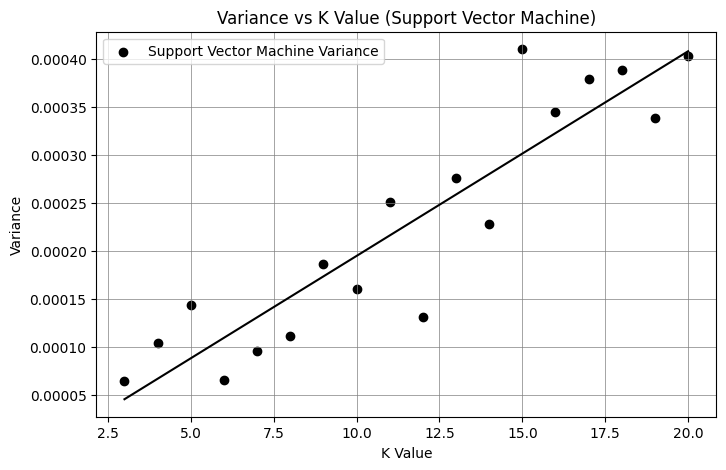

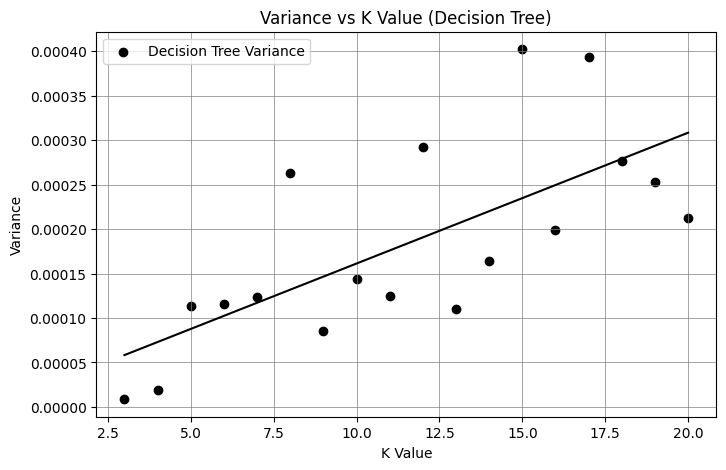

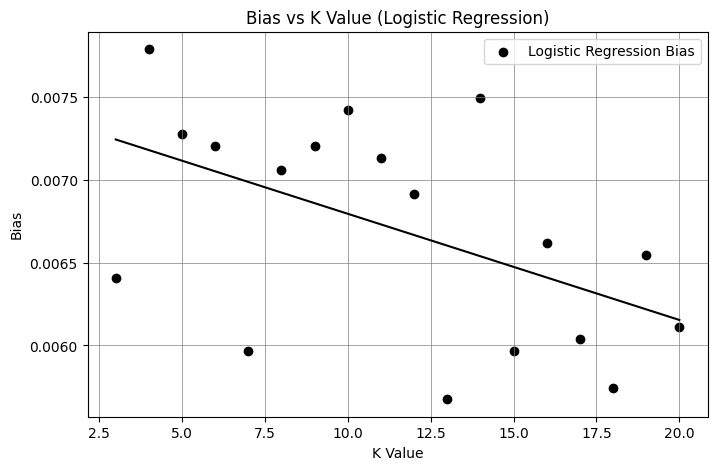

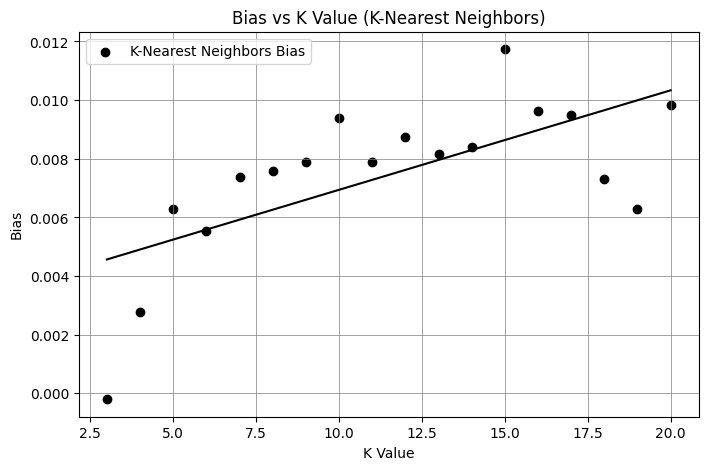

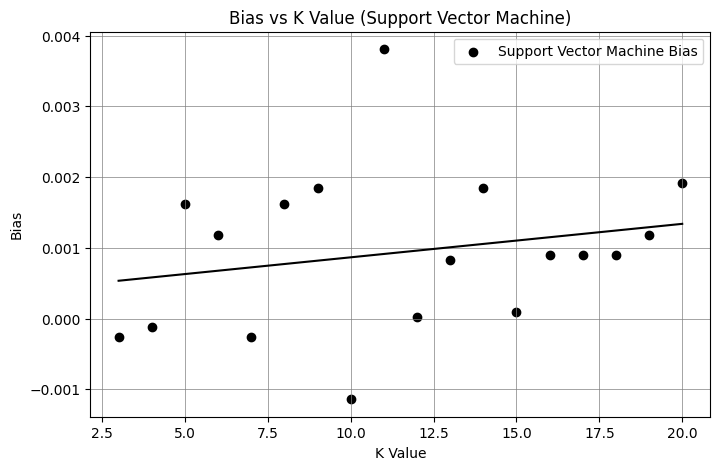

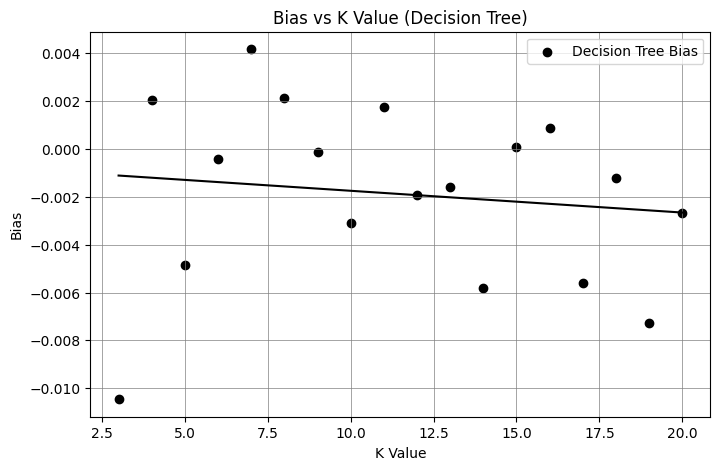

In [23]:
# Generate plots only for Bias and Variance
plot_results(df_results, "Variance", "Variance", "Effect of K on Variance")
plot_results(df_results, "Bias", "Bias", "Effect of K on Bias (Train Accuracy - Test Accuracy)")

In [7]:
# Function to plot grouped Bias and Variance graphs (4 per image)
def plot_grouped_results(df, metric, ylabel, title_suffix, filename):
    models_list = df["Model"].unique()  # Get unique model names
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create 2x2 subplot grid

    for i, model_name in enumerate(models_list[:4]):  # Limit to 4 models
        ax = axes[i // 2, i % 2]  # Position in 2x2 grid

        # Filter data for a specific model
        model_data = df[df["Model"] == model_name]
        x = model_data["K"].values
        y = model_data[metric].values

        # Scatter plot (Black markers)
        ax.scatter(x, y, color="black", label=f"{model_name} {ylabel}")

        # Fit and plot a straight trend line (Linear regression of degree 1)
        z = np.polyfit(x, y, 1)  # Linear trend line
        p = np.poly1d(z)
        ax.plot(x, p(x), color="black")  # Solid black trend line

        # Labels and title
        ax.set_xlabel("K Value")
        ax.set_ylabel(ylabel)
        ax.set_title(f"{model_name}")

        ax.legend()
        ax.grid(color='black', linestyle='--', linewidth=0.5)

    # Adjust layout and show plot
    plt.suptitle(title_suffix, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save image
    plt.show()

# Generate grouped plots for Bias and Variance (Each containing 4 graphs)
plot_grouped_results(df_results, "Variance", "Variance", "Effect of K on Variance", "variance_graph.png")
plot_grouped_results(df_results, "Bias", "Bias", "Effect of K on Bias", "bias_graphs.png")


NameError: name 'df_results' is not defined